# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

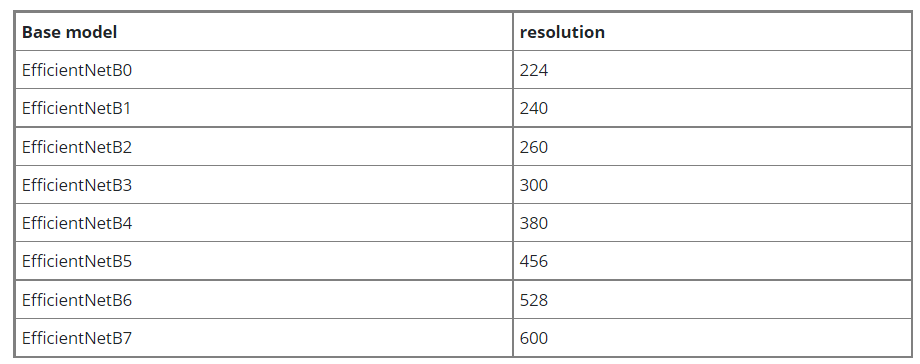

# Data Pre Processing

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('FNNPK')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['-K', '-N', '-P', 'FN']
Types of classes labels found:  4


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('FNNPK' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                     image
0     -K   dataset_path/-K/k_1.png
1     -K  dataset_path/-K/k_10.png
2     -K  dataset_path/-K/k_11.png
3     -K  dataset_path/-K/k_12.png
4     -K  dataset_path/-K/k_13.png
    Labels                    image
203     FN  dataset_path/FN/fn5.png
204     FN  dataset_path/FN/fn6.png
205     FN  dataset_path/FN/fn7.png
206     FN  dataset_path/FN/fn8.png
207     FN  dataset_path/FN/fn9.png


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  208
-K    72
-P    66
-N    58
FN    12
Name: Labels, dtype: int64


In [5]:
import cv2
path = 'FNNPK/'
dataset_path = os.listdir('FNNPK')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(208, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K'
 '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K'
 '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K'
 '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K'
 '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K' '-K'
 '-K' '-K' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N'
 '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N'
 '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N'
 '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N' '-N'
 '-N' '-N' '-N' '-N' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P'
 '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P'
 '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P'
 '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P'
 '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P' '-P'
 'FN' 

In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y).toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(197, 224, 224, 3)
(197, 4)
(11, 224, 224, 3)
(11, 4)



# EfficientNet Implementation :



In [10]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 4
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [11]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 4)                4054695   
                                                                 
Total params: 4,054,695
Trainable params: 4,012,672
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
7/7 - 29s - loss: 5.2055 - accuracy: 0.3249 - 29s/epoch - 4s/step
Epoch 2/30
7/7 - 15s - loss: 2.7451 - accuracy: 0.3858 - 15s/epoch - 2s/step
Epoch 3/30
7/7 - 14s - loss: 2.7704 - accuracy: 0.4721 - 14s/epoch - 2s/step
Epoch 4/30
7/7 - 13s - loss: 2.0902 - accuracy: 0.5127 - 13s/epoch - 2s/step
Epoch 5/30
7/7 - 14s - loss: 1.3362 - accuracy: 0.4822 - 14s/epoch - 2s/step
Epoch 6/30
7/7 - 14s - loss: 2.3493 - accuracy: 0.4873 - 

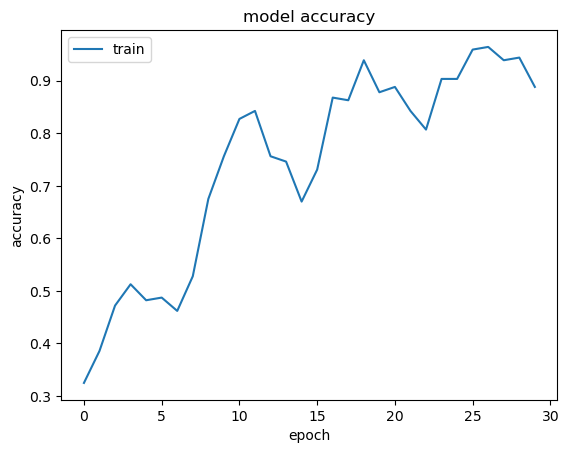

In [12]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [13]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 2s 2s/step - loss: 7.4563 - accuracy: 0.1818
Loss = 7.456328868865967
Test Accuracy = 0.1818181872367859


# Testing Efficient Model On Unseen data

Found 20 images belonging to 4 classes.


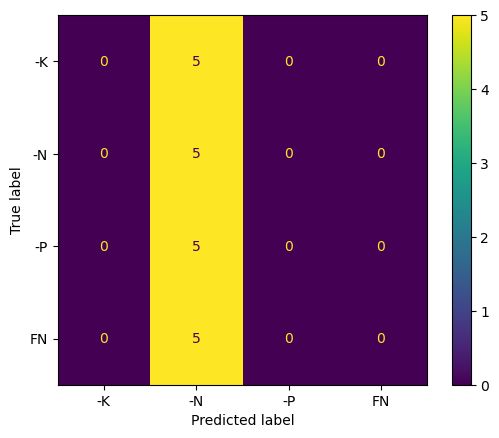

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_path = 'dataset_test'
test_generator = ImageDataGenerator().flow_from_directory(test_path, target_size=(590,455))
predictions = model.predict(x = test_generator, verbose = 0)

test_labels = test_generator.classes
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
test_generator.class_indices

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-K', '-N', '-P', 'FN'])
disp.plot()
plt.show()

#from matplotlib.pyplot import imread
#from matplotlib.pyplot import imshow
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.imagenet_utils import decode_predictions
#from tensorflow.keras.applications.imagenet_utils import preprocess_input


#img_path = 'unseen.jfif'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

#img = cv2.imread(img_path)
#img = cv2.resize(img, (224, 224))

#x = np.expand_dims(img, axis=0)
#x = preprocess_input(x)

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)

In [15]:
#preds=model.predict(x)
#preds     # probabilities for being in each of the 3 classes

In [16]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
#tf.config.experimental.list_physical_devices()

In [17]:
#%%timeit -n1 -r1 
#with tf.device('/CPU:0'):
#    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
#    cpu_performance

In [18]:

#%%timeit -n1 -r1 
#with tf.device('/GPU:0'):
#    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
#    gpu_performance

In [19]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds